In [67]:
# @title import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
# @title load data
url = "/content/drive/MyDrive/IBM Data Analyst/Project 2: RFM Analysis – Phân khúc khách hàng/rfm_transactions.csv"
rfm = pd.read_csv(url)
rfm

,transaction_id,customer_id,transaction_date,amount
0,TXN_00001,CUST_0103,2024-05-29,369.86
1,TXN_00002,CUST_0180,2024-04-12,487.42
2,TXN_00003,CUST_0093,2024-06-14,30.84
3,TXN_00004,CUST_0015,2024-04-12,342.69
4,TXN_00005,CUST_0107,2024-03-30,236.74
...,...,...,...,...
1995,TXN_01996,CUST_0158,2024-05-16,490.71
1996,TXN_01997,CUST_0161,2024-01-08,466.58
1997,TXN_01998,CUST_0077,2024-01-07,467.26
1998,TXN_01999,CUST_0116,2024-02-05,204.10


In [69]:
# @title Khám phá dữ liệu
rfm.isnull().sum()

,0
transaction_id,0
customer_id,0
transaction_date,0
amount,0


In [70]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    2000 non-null   object 
 1   customer_id       2000 non-null   object 
 2   transaction_date  2000 non-null   object 
 3   amount            2000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 62.6+ KB


In [71]:
rfm.describe(include = "all")

,transaction_id,customer_id,transaction_date,amount
count,2000,2000,2000,2000.000000
unique,2000,200,181,NaN
top,TXN_01984,CUST_0190,2024-05-28,NaN
freq,1,19,21,NaN
mean,NaN,NaN,NaN,252.838185
std,NaN,NaN,NaN,142.424579
min,NaN,NaN,NaN,5.090000
25%,NaN,NaN,NaN,130.492500
50%,NaN,NaN,NaN,255.905000
75%,NaN,NaN,NaN,377.677500


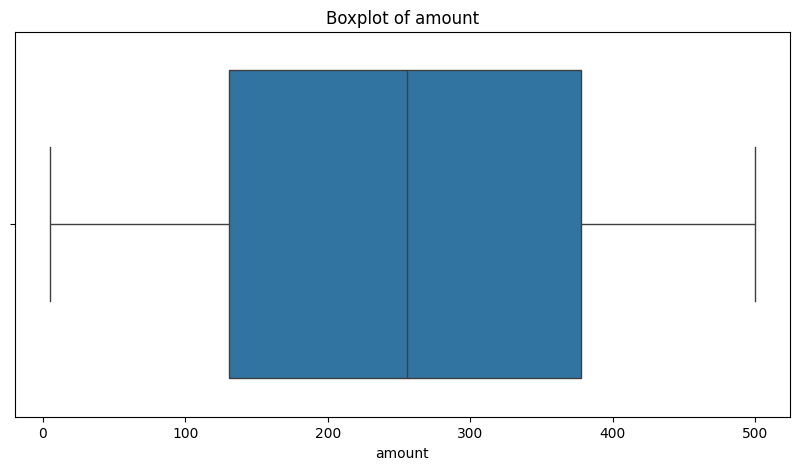

In [72]:
# @title boxplot of amount
plt.figure(figsize = (10,5))
sns.boxplot(x = rfm["amount"])
plt.title("Boxplot of amount")
plt.show()

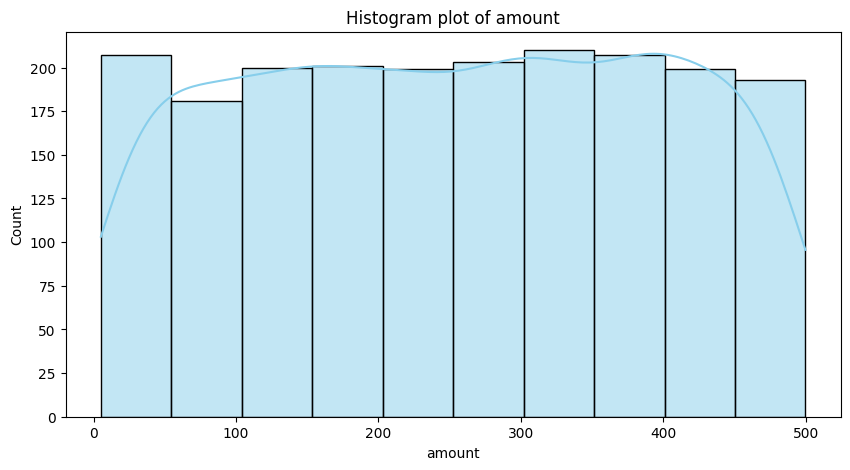

In [73]:
# @title Histogram plot of amount
plt.figure(figsize = (10,5))
sns.histplot(x = rfm["amount"], kde=True, bins=10, color="skyblue")
plt.title("Histogram plot of amount")
plt.show()

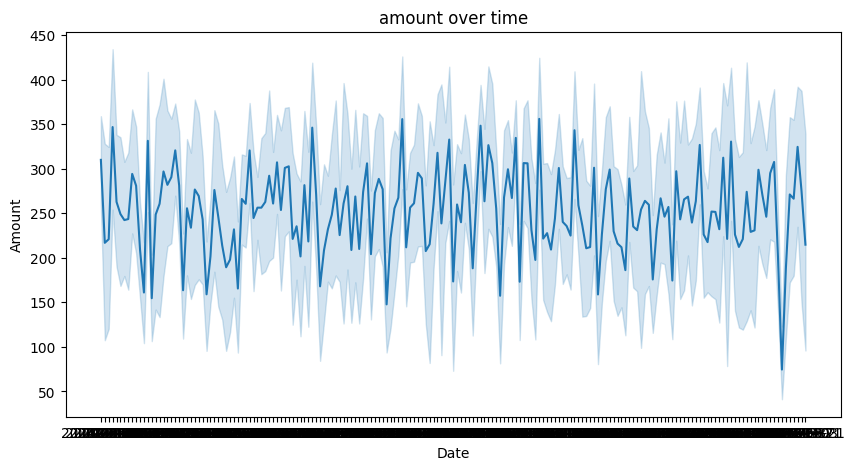

In [74]:
# @title amount over time
plt.figure(figsize = (10,5))
sns.lineplot(x = rfm["transaction_date"], y = rfm["amount"])
plt.title("amount over time")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.show()

In [75]:
# @title Xử lý định dạng dữ liệu
# Xử lý định đạng cột ngày
rfm["transaction_date"] = pd.to_datetime(rfm["transaction_date"])

In [76]:
# Tách thành 3 cột: năm, tháng, ngày
rfm["year"] = rfm["transaction_date"].dt.year
rfm["month"] = rfm["transaction_date"].dt.month
rfm["day"] = rfm["transaction_date"].dt.day

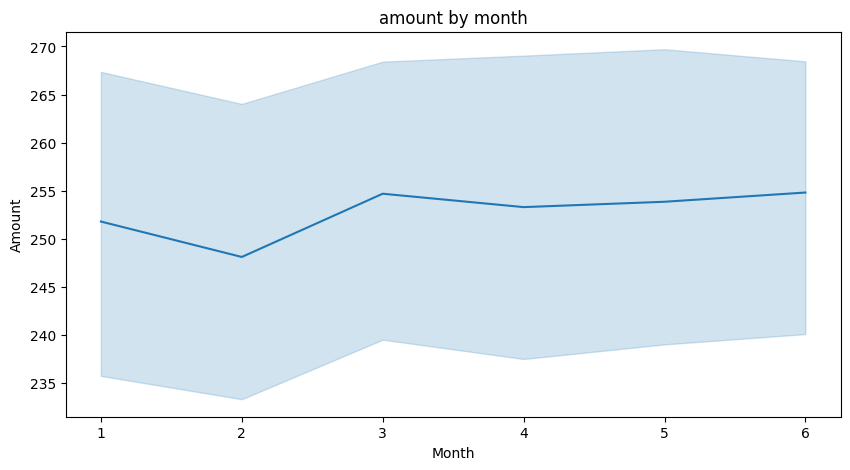

In [77]:
# @title amount by month
plt.figure(figsize = (10,5))
sns.lineplot(x = rfm["month"], y = rfm["amount"])
plt.title("amount by month")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.show()

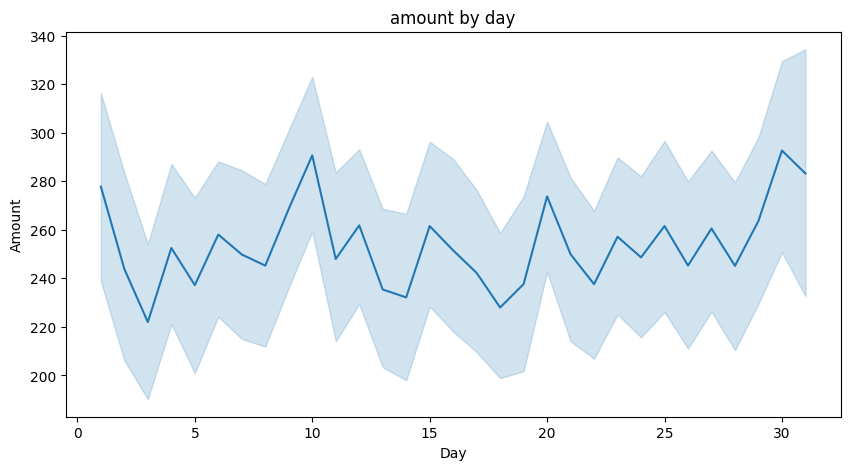

In [78]:
# @title amount by day
plt.figure(figsize = (10,5))
sns.lineplot(x = rfm["day"], y = rfm["amount"])
plt.title("amount by day")
plt.xlabel("Day")
plt.ylabel("Amount")
plt.show()

In [81]:
# @title Nhận xét
# - Hầu như doanh thu phân bổ đều giữa các tháng tuy nhiên tháng 2 doanh thu sụt giảm mạnh
#-> Có thể do sau Tết nên nhu cầu mua sắm giảm, để đẩy doanh số tháng này cần nghiên cứu về nhu cầu và hành vi khách hàng để đẩy chương trình phù hợp.
# - Doanh thu tăng vọt vào ngày cuối tháng và ngày 10 hàng tháng -> có thể đây là thời điểm khách hàng nhận lương nên cảm xúc mua sắm cao
#-> Gợi ý: đẩy các chương trình khuyến mại lớn vào dịp này để kích thích nhu cầu mua sắm của khách hàng -> đạt mục tiêu tăng doanh thu.

In [35]:
#Xác định ngày phân tích (reference date): Ngày cuối cùng trong dữ liệu sẽ là mốc tham chiếu
analysis_date = rfm["transaction_date"].max()
print("Ngày phân tích:", analysis_date)

Ngày phân tích: 2024-06-29 00:00:00


In [36]:
# @title Tính chỉ số RFM cho mỗi khách hàng
rfm = rfm.groupby("customer_id").agg({
    "transaction_date": lambda x: (analysis_date - x.max()).days,  # Recency
    "transaction_id": "count",                                     # Frequency
    "amount": "sum"                                                # Monetary
}).reset_index()

# Đổi tên cột
rfm.columns = ["customer_id", "Recency", "Frequency", "Monetary"]
rfm.head()

,customer_id,Recency,Frequency,Monetary
0,CUST_0001,11,15,3929.69
1,CUST_0002,8,8,2119.60
2,CUST_0003,2,10,3125.83
3,CUST_0004,1,10,2570.56
4,CUST_0005,9,14,3423.01


In [37]:
# @title Phân loại điểm RFM (scoring)
# Tính điểm từng thành phần 1 - tệ, 2 - bình thường, 3 - tốt, 4 - rất tốt
rfm["R_score"] = pd.qcut(rfm["Recency"], 4, labels=[4, 3, 2, 1])
rfm["F_score"] = pd.qcut(rfm["Frequency"].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm["M_score"] = pd.qcut(rfm["Monetary"], 4, labels=[1, 2, 3, 4])

# Gộp thành mã phân khúc RFM
rfm["RFM_Score"] = rfm["R_score"].astype(str) + rfm["F_score"].astype(str) + rfm["M_score"].astype(str)
rfm.head()

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,CUST_0001,11,15,3929.69,3,4,4,344
1,CUST_0002,8,8,2119.60,3,1,2,312
2,CUST_0003,2,10,3125.83,4,2,4,424
3,CUST_0004,1,10,2570.56,4,2,3,423
4,CUST_0005,9,14,3423.01,3,4,4,344


In [46]:
# @title Gắn nhãn phân khúc khách hàng (segment)
def segment(row):
    score = row["RFM_Score"]

    if score == "444":
        return "Best Customers"
    elif score[0] == "4":
        return "Recent Customers"
    elif score[1] == "4":
        return "Frequent Buyers"
    elif score[2] == "4":
        return "Gold Spenders"
    elif score[2] == "3":
        return "Sliver Spenders"
    elif score[0] == "1":
        return "At Risk"
    else:
        return "Others"

rfm["Segment"] = rfm.apply(segment, axis=1)
rfm.head()

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
0,CUST_0001,11,15,3929.69,3,4,4,344,Frequent Buyers
1,CUST_0002,8,8,2119.60,3,1,2,312,Others
2,CUST_0003,2,10,3125.83,4,2,4,424,Recent Customers
3,CUST_0004,1,10,2570.56,4,2,3,423,Recent Customers
4,CUST_0005,9,14,3423.01,3,4,4,344,Frequent Buyers


In [45]:
rfm["Segment"].value_counts()

,count
Segment,
Others,49
Recent Customers,39
At Risk,31
Sliver Spenders,29
Frequent Buyers,28
Best Customers,17
Gold Spenders,7


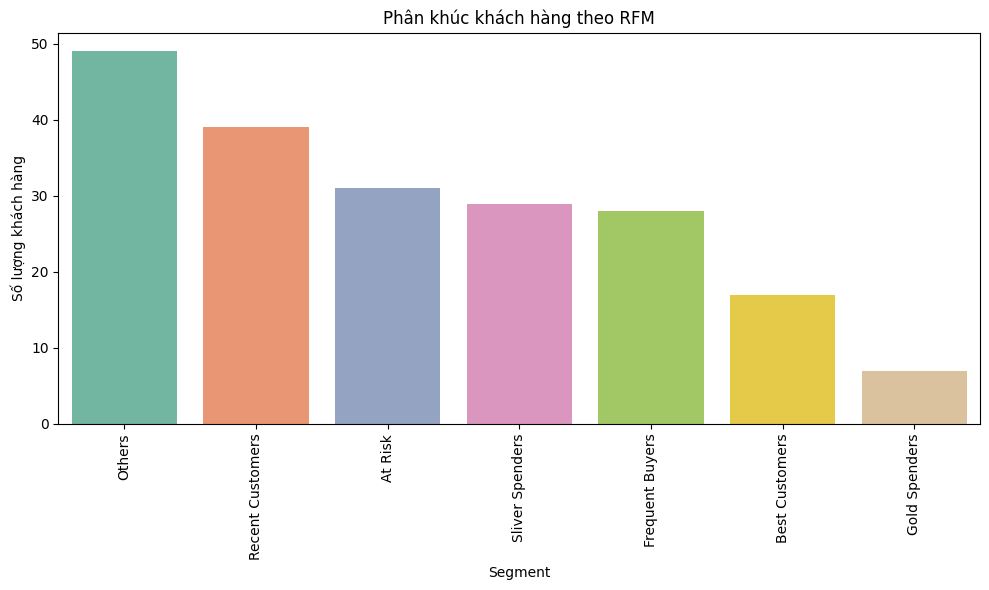

In [51]:
# @title Biểu đồ phân tích phân khúc
plt.figure(figsize=(10,6))
sns.countplot(data=rfm, x="Segment", order=rfm["Segment"].value_counts().index, palette="Set2")
plt.xticks(rotation=90)
plt.title("Phân khúc khách hàng theo RFM")
plt.xlabel("Segment")
plt.ylabel("Số lượng khách hàng")
plt.tight_layout()
plt.show()


In [64]:
# @title Phân tích & đề xuất
# - Nhóm At Risk đứng TOP3 cần warm-up GẤP bằng các chương trình khuyến mại qua các kênh: Email, Notification In-app hoặc Zalo-OA.
# - Giữ chân nhóm Best Customers và Frequent Buyers bằng các voucher khuyến mại hoặc freeship.
# - Với nhóm Recent Customers đẩy cross-sell hoặc upsell.
# - Với nhóm Sliver Spenders kích thích thăng hạng bằng các thông báo các đãi ngộ/đặc quyền nhóm Gold Spenders.